### What is an A/B Test?

- Definition: Controlled experiment where you split data into two groups (A & B) and test if there’s a significant difference in their behavior.

- Example: Website shows button in blue (Group A) vs red (Group B). Measure conversion rate difference.

### Why is it important for ML?

- ML models often assume patterns exist → before modeling, you test if a difference is real or just random chance.

- Hypothesis testing = foundation of evaluating ML model performance (e.g., is Model A really better than Model B?).

### Core Tools

- Random splitting of data into groups (simulating experiment).

- Metric to compare (conversion rate, profit, etc.).

- Statistical test (like t-test) to check if observed difference is significant.

### 1. Do we need at least 2 groups?

- Yes ✅ — classic A/B testing means comparing two groups (A vs B).
 
- Group A → control (status quo)

- Group B → treatment (change/experiment)

- Without two groups, there’s nothing to compare.

### 2. Can we have more than 2 groups?

- Yes ✅ — that’s called A/B/n testing.

- Example: Testing 3 ad designs:
 
- Group A → Blue Button
 
- Group B → Red Button
 
- Group C → Green Button

- 👉 Here you’re checking which of the 3 groups performs best.
- 👉 Statistically, instead of a t-test, you’d usually use ANOVA (Analysis of Variance) or chi-square test if dealing with proportions.

### 3. Can we have just 1 group?

- Not really ❌ — because testing means comparison.
- But… there are some workarounds:

#### A/A Testing:

- Split 1 group into two random halves (both see the same experience).

- Purpose: Check if your randomization & metrics are working correctly.
 
- If your system shows a difference when groups are identical → you know something’s wrong.

#### Single-Group Pre/Post Testing (not exactly A/B):

- Measure metric before a change vs after the change in the same group.
 
- Example: Average sales per customer in July vs August after discount campaign.

- Here you use a paired t-test, but it’s weaker than real A/B because external factors (season, economy, etc.) can affect results.

### ✅ Recap

- Minimum = 2 groups → true A/B testing.
- 
- More than 2 groups → A/B/n testing (use ANOVA).
- 
- 1 group only → not A/B testing, but you can simulate by splitting it (A/A) or doing before-vs-after comparisons.

### What is a t-test?

- A t-test is a statistical hypothesis test used to determine if there’s a significant difference between the means of two groups.

- Think of it like this:

- 👉 You have two groups (A & B).
- 👉 You measure something for both (e.g., Profit Margin %).
- 👉 You ask: Are their averages different enough that it’s unlikely due to random chance?

- That’s exactly what the t-test answers.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/superstore.csv")

In [5]:
# Random split of customers into groups
np.random.seed(42)  # reproducibility
df["Group"] = np.where(np.random.rand(len(df)) > 0.5, "A", "B")

In [ ]:
group_means = df.groupby("Group")["Profit Margin %"].mean()
print(group_means)

Group
A    11.960930
B    12.102947
Name: Profit Margin %, dtype: float64
12.033025825827847


In [15]:
from scipy.stats import ttest_ind

group_a = df[df["Group"]=="A"]["Profit Margin %"]
group_b = df[df["Group"]=="B"]["Profit Margin %"]

t_stat, p_val = ttest_ind(group_a, group_b, equal_var=False)
print("t-statistic:", t_stat, "p-value:", p_val)


t-statistic: -0.15211968466266354 p-value: 0.8790956103498591


In [16]:
# If p < 0.05 → significant difference → your groups behave differently.
# If p ≥ 0.05 → no significant difference → the split didn’t affect outcome.

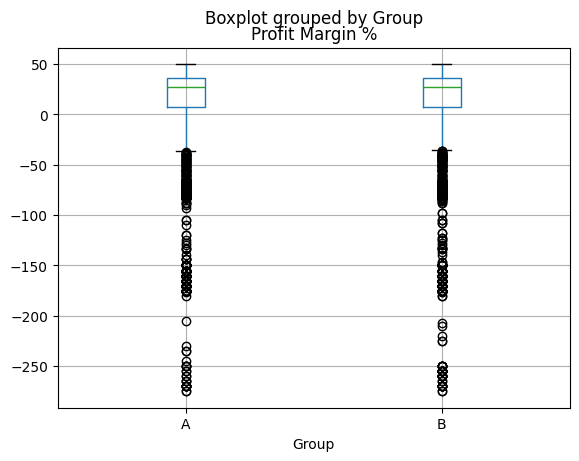

In [17]:
import matplotlib.pyplot as plt

df.boxplot(column="Profit Margin %", by="Group")
plt.show()